### Decision Tree

数学上如何使用信息论划分数据集

- 熵，为信息的期望值。而什么是信息？


- 信息，如果待分类的事务可能划分在多个分类之中，则符号$x_i$的信息定义为：${\color{red}{(放大信号,如下图)}}$
$$l(x_i)=-\log_2 p(x_i)$$   
其中$p(x_i)$是选择该分类的概率。



- 为了计算熵H，需要计算所有类别所有可能值包含的信息期望值：
$$H=-\sum_{i=1}^n\ p(x_i)\log_2 p(x_i)$$
其中n是分类的数目。

(-1, 10)

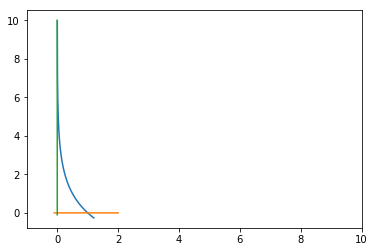

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import math

x=np.arange(0,1.2,0.001)
y=[-math.log(i,2) for i in x[1:]]
plt.plot(x[1:],y)
plt.plot(np.arange(-0.1,2,0.001),[0]*len(np.arange(-0.1,2,0.001)))
plt.plot([0]*len(np.arange(-0.1,10,0.001)),np.arange(-0.1,10,0.001))
plt.xlim(-1,10)

In [67]:
#计算信给定数据集的香农熵
def calcShannonEnt(dataSet):
    numEntries=len(dataSet)    #统计数据集中样本总数
    labelCounts={}
    for featVec in dataSet:    #逐行循环数据集
        currentLabel=featVec[-1]   #每个样本即每行的最后一元素是该样本的类别标签，用作字典的键，统计出现频率
        if currentLabel not in labelCounts.keys():   #如果当前循环的类别标签第一次出现，即初始化该键值对的值为0
            labelCounts[currentLabel]=0
        labelCounts[currentLabel]+=1     #每次将当前循环中列表标签的统计频数加1
    shannonEnt=0   #最后返回的香农熵值初始化0，用于后面循环的累加操作
    for key in labelCounts:    #循环所有类别标签
        prob=labelCounts[key]/numEntries  #统计每个类别标签出现的概率
        shannonEnt-=prob*math.log(prob,2) #根据公式通过累加操作计算香农熵
    return shannonEnt

In [62]:
#创建简单数据集
def createDataSet():
    dataSet=[[1,1,'yes'],[1,1,'yes'],[1,0,'no'],[0,1,'no'],[0,1,'no']]
    labels=['no surfacing','flippers']
    return dataSet,labels

In [69]:
myDat,labels=createDataSet()
print(myDat)
print(calcShannonEnt(myDat))

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]
0.9709505944546686


！！熵越高，则混合的数据也越多

In [82]:
#在数据集中添加更多的分类，观察熵的变化
#增加第三个名为maybe的分类
myDat[0][-1]='maybe'
print(myDat)
print(calcShannonEnt(myDat),'<- 看...高了吧')

[[1, 1, 'maybe'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]
1.3709505944546687 <- 看...高了吧


In [83]:
#按照给定特征划分数据集(抽取符合当前特征的当前取值的所有样本，返回列表已删除当前特征)
def splitDataSet(dataSet,axis,value):
    retDataSet=[]
    for featVec in dataSet:
        if featVec[axis]==value:
            reducedFeatVec=featVec[:axis]    #生成重组列表，删除当前循环中的特征
            reducedFeatVec.extend(featVec[axis+1:])    #添加参数列表的元素级别，可为操作列表的多元素添加
            retDataSet.append(reducedFeatVec)    #添加参数列表的整体作为操作列表的一个元素
    return retDataSet

In [86]:
#在简单样本数据上测试划分数据集函数splitDataSet()
myDat,labels=createDataSet()
print(myDat)
print(splitDataSet(myDat,0,1))
print(splitDataSet(myDat,0,0))

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]
[[1, 'yes'], [1, 'yes'], [0, 'no']]
[[1, 'no'], [1, 'no']]


In [89]:
#便利整个数据集，循环计算香农熵和splitDataSet()函数，找到最好的特征划分方式。
#熵计算将会告诉我们如何划分数据集是最好的数据组织方式
def chooseBestFeatureToSplit(dataSet):
    numFeatures=len(dataSet[0])-1   #特征属性数量
    baseEntropy=calcShannonEnt(dataSet)
    bestInfoGain=0
    bestFeature=-1
    for i in range(numFeatures):
        featList=[example[i] for example in dataSet]  #dataSet是列表，所以要一个个元素级别循环取当前特征值
        uniqueVals=set(featList)
        newEntropy=0
        for value in uniqueVals:
            subDataSet=splitDataSet(dataSet,i,value)
            prob=len(subDataSet)/len(dataSet)
            newEntropy+=prob*calcShannonEnt(subDataSet)
        infoGain=baseEntropy-newEntropy
        if(infoGain>bestInfoGain):
            bestInfoGain=infoGain
            bestFeature=i
    return bestFeature

In [90]:
#测试实际输出结果
myDat,labels=createDataSet()
chooseBestFeatureToSplit(myDat)

0

In [96]:
print(calcShannonEnt(splitDataSet(myDat,0,1)),'+',calcShannonEnt(splitDataSet(myDat,0,0)),'=',calcShannonEnt(splitDataSet(myDat,0,1))+calcShannonEnt(splitDataSet(myDat,0,0)))

0.9182958340544896 + 0.0 = 0.9182958340544896


In [97]:
print(calcShannonEnt(splitDataSet(myDat,1,1)),'+',calcShannonEnt(splitDataSet(myDat,1,0)),'=',calcShannonEnt(splitDataSet(myDat,1,1))+calcShannonEnt(splitDataSet(myDat,1,0)))

1.0 + 0.0 = 1.0
